## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  78.986412   205.251193  0.052471   2.892364  0.320199
1   4.273876   817.639047  0.516882   5.341913  1.608483
2  67.592030  1517.338574  0.212889   2.465118  1.498492
3  44.834598   350.185877  0.161356  10.157031  0.910392
4  95.214807   637.461403  0.303685   1.655028  0.997740


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9734514	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9643026	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9556828	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9458934	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9371444	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9277107	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9202303	total: 60.6ms	remaining: 8.59s
7:	learn: 0.9130376	total: 61.1ms	remaining: 7.57s
8:	learn: 0.9075554	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8979916	total: 62ms	remaining: 6.13s
10:	learn: 0.8890829	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8804961	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8712084	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8648511	total: 63.8ms	remaining: 4.5s
14:	learn: 0.8589097	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8504507	total: 64.9ms	remaining: 3.99s
16:	learn: 0.8415997	total: 65.1ms	remaining: 3.77s
17:	learn: 0.8340587	total: 65.7ms	remaining: 3.58s
18:	learn: 0.8267600	total: 66.1ms	remaining: 3

115:	learn: 0.4004120	total: 109ms	remaining: 828ms
116:	learn: 0.3974421	total: 109ms	remaining: 824ms
117:	learn: 0.3949606	total: 109ms	remaining: 818ms
118:	learn: 0.3927612	total: 110ms	remaining: 813ms
119:	learn: 0.3908209	total: 110ms	remaining: 809ms
120:	learn: 0.3889584	total: 111ms	remaining: 803ms
121:	learn: 0.3866132	total: 111ms	remaining: 798ms
122:	learn: 0.3841257	total: 111ms	remaining: 793ms
123:	learn: 0.3825435	total: 112ms	remaining: 789ms
124:	learn: 0.3811289	total: 112ms	remaining: 784ms
125:	learn: 0.3786063	total: 112ms	remaining: 779ms
126:	learn: 0.3758837	total: 113ms	remaining: 775ms
127:	learn: 0.3734780	total: 113ms	remaining: 770ms
128:	learn: 0.3711538	total: 113ms	remaining: 766ms
129:	learn: 0.3690917	total: 114ms	remaining: 762ms
130:	learn: 0.3664408	total: 114ms	remaining: 758ms
131:	learn: 0.3644333	total: 115ms	remaining: 754ms
132:	learn: 0.3628828	total: 115ms	remaining: 750ms
133:	learn: 0.3610291	total: 116ms	remaining: 747ms
134:	learn: 

290:	learn: 0.1997273	total: 185ms	remaining: 451ms
291:	learn: 0.1994700	total: 186ms	remaining: 450ms
292:	learn: 0.1988018	total: 186ms	remaining: 449ms
293:	learn: 0.1980160	total: 187ms	remaining: 448ms
294:	learn: 0.1973906	total: 187ms	remaining: 447ms
295:	learn: 0.1966906	total: 187ms	remaining: 446ms
296:	learn: 0.1964033	total: 188ms	remaining: 445ms
297:	learn: 0.1960123	total: 188ms	remaining: 443ms
298:	learn: 0.1955040	total: 189ms	remaining: 442ms
299:	learn: 0.1948548	total: 189ms	remaining: 442ms
300:	learn: 0.1944667	total: 190ms	remaining: 441ms
301:	learn: 0.1942036	total: 190ms	remaining: 440ms
302:	learn: 0.1937160	total: 191ms	remaining: 439ms
303:	learn: 0.1934333	total: 191ms	remaining: 438ms
304:	learn: 0.1932080	total: 192ms	remaining: 437ms
305:	learn: 0.1924316	total: 192ms	remaining: 436ms
306:	learn: 0.1918782	total: 193ms	remaining: 435ms
307:	learn: 0.1915114	total: 193ms	remaining: 434ms
308:	learn: 0.1907675	total: 194ms	remaining: 433ms
309:	learn: 

522:	learn: 0.1016543	total: 290ms	remaining: 264ms
523:	learn: 0.1014783	total: 290ms	remaining: 264ms
524:	learn: 0.1013050	total: 291ms	remaining: 263ms
525:	learn: 0.1008886	total: 291ms	remaining: 262ms
526:	learn: 0.1007179	total: 291ms	remaining: 262ms
527:	learn: 0.1003120	total: 292ms	remaining: 261ms
528:	learn: 0.1001438	total: 292ms	remaining: 260ms
529:	learn: 0.0995844	total: 293ms	remaining: 260ms
530:	learn: 0.0991872	total: 293ms	remaining: 259ms
531:	learn: 0.0987064	total: 294ms	remaining: 258ms
532:	learn: 0.0985410	total: 294ms	remaining: 258ms
533:	learn: 0.0983782	total: 294ms	remaining: 257ms
534:	learn: 0.0982178	total: 295ms	remaining: 256ms
535:	learn: 0.0980598	total: 295ms	remaining: 256ms
536:	learn: 0.0978429	total: 296ms	remaining: 255ms
537:	learn: 0.0976873	total: 297ms	remaining: 255ms
538:	learn: 0.0974735	total: 297ms	remaining: 254ms
539:	learn: 0.0972630	total: 297ms	remaining: 253ms
540:	learn: 0.0971096	total: 298ms	remaining: 253ms
541:	learn: 

703:	learn: 0.0623758	total: 366ms	remaining: 154ms
704:	learn: 0.0622432	total: 366ms	remaining: 153ms
705:	learn: 0.0621203	total: 367ms	remaining: 153ms
706:	learn: 0.0620948	total: 367ms	remaining: 152ms
707:	learn: 0.0619642	total: 367ms	remaining: 151ms
708:	learn: 0.0618428	total: 368ms	remaining: 151ms
709:	learn: 0.0618177	total: 368ms	remaining: 150ms
710:	learn: 0.0616891	total: 368ms	remaining: 150ms
711:	learn: 0.0615691	total: 369ms	remaining: 149ms
712:	learn: 0.0613316	total: 369ms	remaining: 149ms
713:	learn: 0.0613068	total: 369ms	remaining: 148ms
714:	learn: 0.0612775	total: 370ms	remaining: 147ms
715:	learn: 0.0611512	total: 370ms	remaining: 147ms
716:	learn: 0.0609495	total: 371ms	remaining: 146ms
717:	learn: 0.0607169	total: 371ms	remaining: 146ms
718:	learn: 0.0605735	total: 372ms	remaining: 145ms
719:	learn: 0.0604567	total: 372ms	remaining: 145ms
720:	learn: 0.0603329	total: 372ms	remaining: 144ms
721:	learn: 0.0601044	total: 372ms	remaining: 143ms
722:	learn: 

944:	learn: 0.0356602	total: 471ms	remaining: 27.4ms
945:	learn: 0.0355382	total: 471ms	remaining: 26.9ms
946:	learn: 0.0355033	total: 472ms	remaining: 26.4ms
947:	learn: 0.0354688	total: 472ms	remaining: 25.9ms
948:	learn: 0.0353677	total: 473ms	remaining: 25.4ms
949:	learn: 0.0353338	total: 473ms	remaining: 24.9ms
950:	learn: 0.0352037	total: 473ms	remaining: 24.4ms
951:	learn: 0.0351296	total: 474ms	remaining: 23.9ms
952:	learn: 0.0350964	total: 474ms	remaining: 23.4ms
953:	learn: 0.0349689	total: 475ms	remaining: 22.9ms
954:	learn: 0.0348958	total: 475ms	remaining: 22.4ms
955:	learn: 0.0347656	total: 476ms	remaining: 21.9ms
956:	learn: 0.0346005	total: 476ms	remaining: 21.4ms
957:	learn: 0.0345039	total: 476ms	remaining: 20.9ms
958:	learn: 0.0344050	total: 477ms	remaining: 20.4ms
959:	learn: 0.0343426	total: 477ms	remaining: 19.9ms
960:	learn: 0.0342461	total: 478ms	remaining: 19.4ms
961:	learn: 0.0340870	total: 478ms	remaining: 18.9ms
962:	learn: 0.0340261	total: 478ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

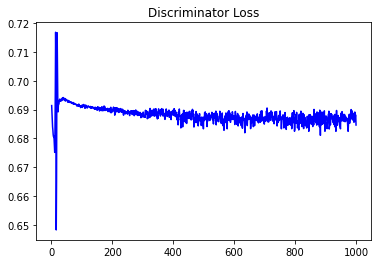

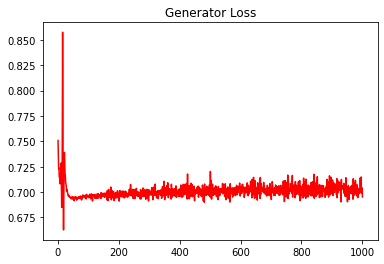

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12695771627730748


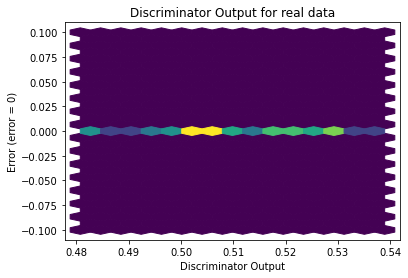

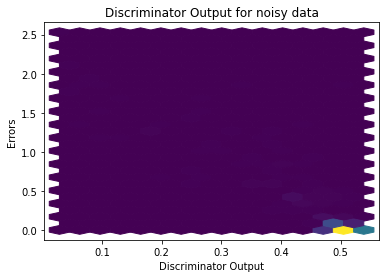

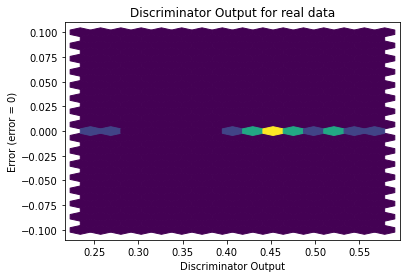

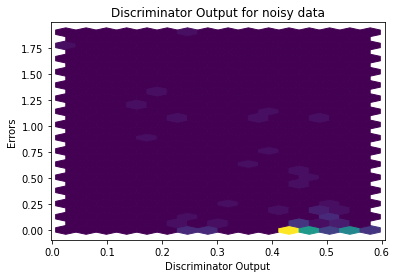

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


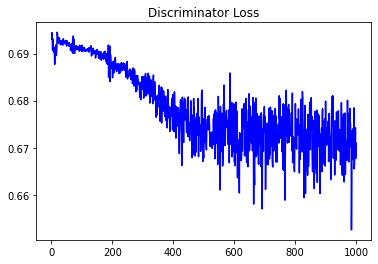

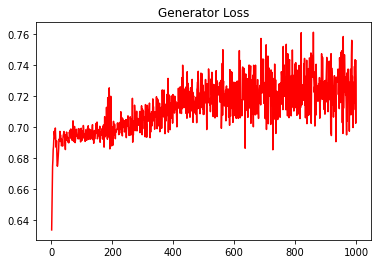

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15209039157954318


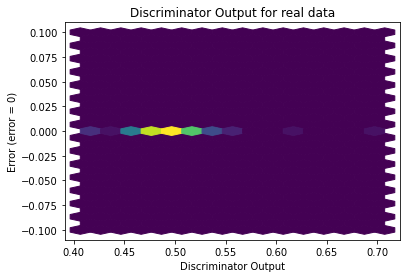

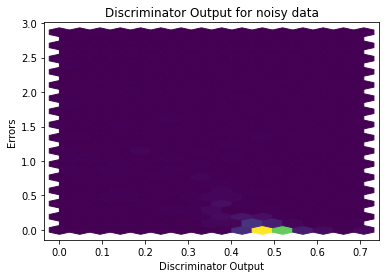

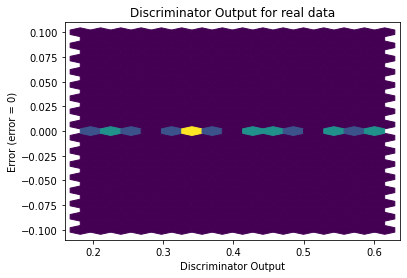

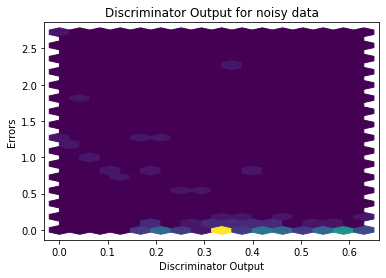

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4659]], requires_grad=True)
